In [1]:
import os 

os.chdir("D:\\Burmese-OCR\\data\\numbers 3.0\\")

In [3]:
data2 = []
class_name2= []
for class_name in os.listdir(os.getcwd()):
    path = os.path.join(os.getcwd(),class_name)
    print(class_name)
    for data in os.listdir(os.path.join(path)):
        data2.append(os.path.join(path,data))
        class_name2.append(class_name)
        #print(data2)

1040
1041
1042
1043
1044
1045
1046
1047
1048
1049


In [4]:
data2[2]

'D:\\Burmese-OCR\\data\\numbers 3.0\\1040\\100.png'

In [5]:
import cv2 

test_data = cv2.imread(data2[0])
test_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

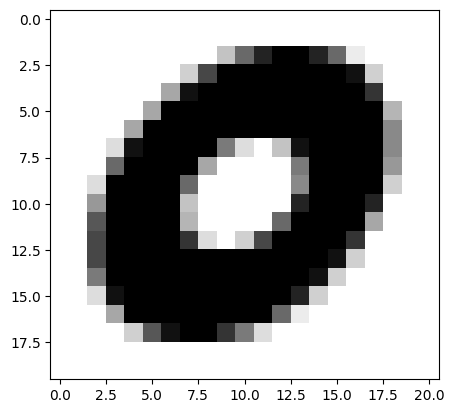

In [6]:
from matplotlib import pyplot as plt 

plt.imshow(test_data)

In [15]:
import numpy as np

preprocessing_image = []
for i in data2:
    image = cv2.imread(i)
    image = cv2.resize(image, (64,64))
    image = np.array(image)
    preprocessing_image.append(image)

In [16]:

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labels_int   = le.fit_transform(class_name2)      
labels_onehot = to_categorical(labels_int)    
labels_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(preprocessing_image,labels_onehot,test_size=0.2,random_state=0,shuffle=True)

In [18]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1712, 64, 64, 3)
(1712, 10)
(428, 64, 64, 3)
(428, 10)


In [12]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import layers

input_shape = (64, 64, 3)
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model.summary()

d:\anaconda3\envs\langchain\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       184,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,578 (1.06 MB)

 Trainable params: 277,578 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer=Adam())

In [21]:
history = model.fit(x=x_train,y=y_train, validation_data=[x_test,y_test], epochs=10, batch_size=32)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3704 - loss: 22.2968 - val_accuracy: 0.9393 - val_loss: 0.2778
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9642 - loss: 0.1123 - val_accuracy: 0.9720 - val_loss: 0.1656
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9861 - loss: 0.0403 - val_accuracy: 0.9790 - val_loss: 0.1436
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9921 - loss: 0.0270 - val_accuracy: 0.9696 - val_loss: 0.1500
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9941 - loss: 0.0176 - val_accuracy: 0.9766 - val_loss: 0.2170
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9696 - val_loss: 0.2193
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9913 - loss: 0.0265 - val_accuracy: 0.9790 - val_loss: 0.1783
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9973 - loss: 0.0108 - val_accuracy: 0.9813 - 

In [22]:
eval_loss , eval_acc = model.evaluate(x_test,y_test)
print(eval_loss)
print(eval_acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9743 - loss: 0.2681
0.22790153324604034
0.9789719581604004


In [28]:
test_image = r"D:\Burmese-OCR\images.jpg"
test_image = cv2.imread(test_image)
test_image = cv2.resize(test_image, (64,64))
test_image = np.array(test_image)
test_image.shape

(64, 64, 3)

In [29]:
test_image = test_image.reshape(1,64,64,3)

In [30]:
result = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [31]:
result

array([[4.0003024e-17, 5.1264461e-25, 2.4875304e-34, 5.5432620e-18,
        8.2030328e-07, 9.2095204e-21, 9.9999917e-01, 1.1156237e-20,
        2.0809153e-12, 2.7942168e-17]], dtype=float32)

In [32]:
[np.argmax(result)]

[6]

In [33]:
model.save('simple_cnn.h5')

In [49]:
os.chdir(r"D:\\Burmese-OCR\\src\\model")

In [53]:
load_model = tf.keras.models.load_model(os.getcwd()+"\\simple_cnn.h5") 

In [56]:
result = load_model.predict(test_image)
print([np.argmax(result)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
[6]
